# Assignment 2

Fundamentals of Machine Learning <br>
Master Data-Driven Design <br>
University of Applied Science Utrecht

In [1]:
# importing stuff
import pandas as pd
import datetime
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
%matplotlib inline

### Preparing the data for analysis

In [2]:
# open de dataframes with the right seperators
step_data = pd.read_csv('Assignment 1 - steps data.csv', sep=';')
survey_data = pd.read_csv('Assignment 1 - survey data.csv')

In [3]:
# merge the two dataframes, add mean steps column and show the head of the dataframe
data = survey_data.merge(step_data, on = 'id')
step_columns = data.loc[: , '20-6-2013':'13-5-2014']
data['mean_steps'] = step_columns.mean(axis=1)
data.head(5)

,id,city,gender,age,hh_size,hh_type,education,height,weight,waist,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,mean_steps
0,1,Montpellier,male,25-34,2,couple,master or doctorate,183.0,62.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6757.911765
1,2,Montpellier,female,25-34,2,couple,high school,163.0,60.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3403.964706
2,3,Lyon,female,25-34,2,couple,master or doctorate,172.0,65.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4986.550505
3,4,Lyon,male,25-34,3,single parent,bachelor,182.0,85.0,95.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6264.478261
4,5,Bordeaux,male,25-34,2,couple,master or doctorate,177.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5516.014493


### The relation of mean steps per participant with at least 2 other quantitative variables

In [4]:
# make subset with three quantitative variables and show correlation matrix
data_subset = data[['height', 'weight', 'mean_steps']]
data_subset.corr(method='pearson')

,height,weight,mean_steps
height,1.000000,0.566777,-0.093685
weight,0.566777,1.000000,-0.169415
mean_steps,-0.093685,-0.169415,1.000000


#### Mean steps and height

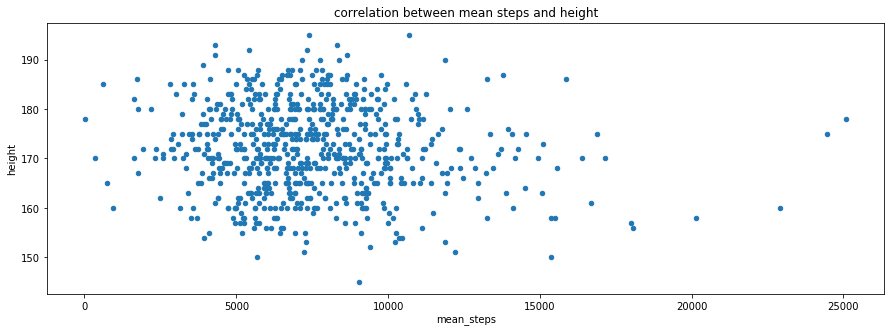

In [5]:
data_subset.plot.scatter(x='mean_steps', y='height', title = 'correlation between mean steps and height', figsize=(15, 5))

In [6]:
data_subset[['mean_steps', 'height']].corr(method='pearson')

,mean_steps,height
mean_steps,1.000000,-0.093685
height,-0.093685,1.000000


-0.093685 is fairly close to zero, so we can assume that there is no correlation between the average amount of steps a person takes a day and their height. As you can see in the scatterplot, there is a cloud of datapoints but they are not even close to being on a linear line.

#### Mean steps and weight

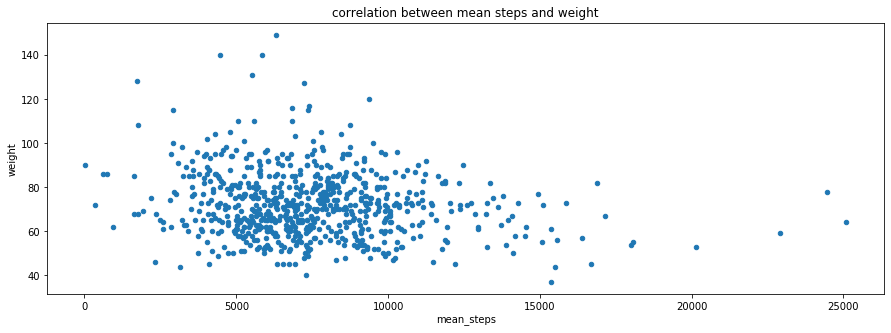

In [7]:
data_subset.plot.scatter(x='mean_steps', y='weight', title = 'correlation between mean steps and weight', figsize=(15, 5))

In [8]:
data_subset[['mean_steps', 'weight']].corr(method='pearson')

,mean_steps,weight
mean_steps,1.000000,-0.169415
weight,-0.169415,1.000000


The pearson correlation of mean steps and weight (-0.169415) is higher than the one of mean steps and height, but it is still way too low. We can assume that there is no correlation between the average amount of steps a person takes a day and their weight. As you can see in the scatterplot, there is a cloud of datapoints but they are not even close to being on a linear line.

### The relation of mean steps per participant with a qualitative variable with two levels

#### Mean steps and living alone

In [9]:
# change the variabele household size (integer) into living alone (true (1) or false (>1))
data_subset2 = data[['hh_size', 'mean_steps']]
data_subset2['hh_size'].values[data_subset2['hh_size'].values >= 2] = 2
data_subset2.hh_size.replace([1, 2], [True, False], inplace=True)
data_subset2.rename(columns={'hh_size':'living alone'}, inplace=True)

# the warning wasn't there the first time I ran this code, but even with: it still works

/Users/annatol/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/annatol/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


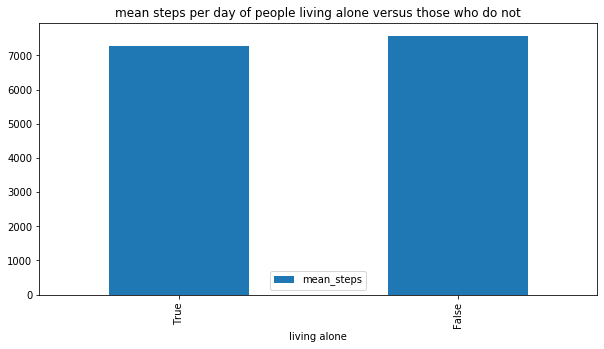

In [10]:
# take the means and plot the differences between living alone or not
data_subset3 = data_subset2.groupby('living alone').mean()
data_subset3['living alone'] = data_subset3.index
data_subset3.sort_values(by=['mean_steps']).plot.bar(x='living alone', y='mean_steps', title = 'mean steps per day of people living alone versus those who do not', figsize=(10, 5))

In [11]:
# drop null values
data_subset2 = data_subset2.dropna()
# get two groups to compare with t-test
group1 = data_subset2[data_subset2['living alone'] == True]
group2 = data_subset2[data_subset2['living alone'] == False]
# execute t-test
ttest_ind(group1['mean_steps'], group2['mean_steps'])

Ttest_indResult(statistic=-1.1450490090089074, pvalue=0.2525746882336011)

Since the p-value is higher than 0.05, we cannot assume that there is a significant difference between the two groups. This means that whether you live alone or not has no correlation with the amount of steps you take on a day.

#### Mean steps and weekday

In [12]:
# function that returns the day of the week for a date
def weekend(date):
    day, month, year = (int(x) for x in date.split('-'))    
    weekday = datetime.date(year, month, day).strftime("%A")
    if weekday == 'Sunday' or weekday == 'Saturday':
        return True
    else:
        return False

In [13]:
# determine which days are weekends and create a dataset with mean steps for week- and weekenddays
step_data_subset = step_data.set_index('id')
weekends = [weekend(column) for column in step_data_subset.columns]
step_data_subset = step_data_subset.transpose()
step_data_subset.columns = step_data_subset.columns.map(str)
step_data_subset['mean_steps'] = step_data_subset.mean(axis=1)
step_data_subset['weekend'] = weekends
data_subset4 = step_data_subset[['weekend', 'mean_steps']]

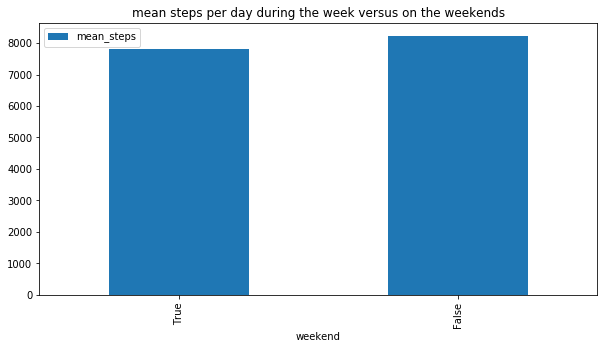

In [14]:
# take the means and plot the differences between week and weekend
data_subset5 = data_subset4.groupby('weekend').mean()
data_subset5['weekend'] = data_subset3.index
data_subset5.sort_values(by=['mean_steps']).plot.bar(x='weekend', y='mean_steps', title = 'mean steps per day during the week versus on the weekends', figsize=(10, 5))

In [15]:
# drop null values
data_subset4 = data_subset4.dropna()
# get two groups to compare with t-test
group1 = data_subset4[data_subset4['weekend'] == True]
group2 = data_subset4[data_subset4['weekend'] == False]
# execute t-test
ttest_ind(group1['mean_steps'], group2['mean_steps'])

Ttest_indResult(statistic=-3.682077487642583, pvalue=0.00027081376024546886)

Since the p-value is lower than 0.05, we can assume that there is a difference between the two groups. In the plot you can see that during the week people walk more on average than during the weekend. So, people walk significantly more during the week than they do on the weekends.

### The relation between two qualitative variables

In [16]:
# subset needed data
data_subset6 = data[['gender', 'education']]

In [17]:
# create a crosstable with the variables gender and education
cross_table = pd.crosstab(data_subset6.gender, data_subset6.education).apply(lambda r: r/r.sum()*100, axis=1)

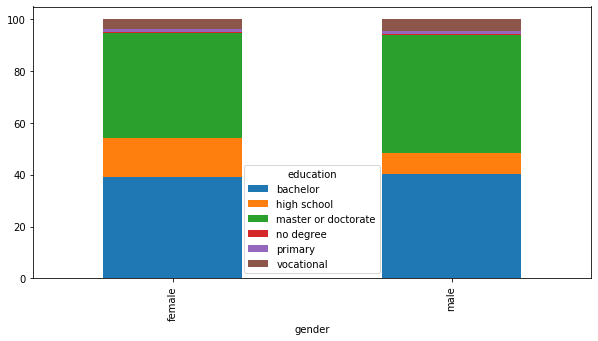

In [18]:
# make a stacked bar chart
cross_table.plot.bar(stacked=True, figsize=(10, 5))

In [19]:
# display the crosstable
cross_table

education,bachelor,high school,master or doctorate,no degree,primary,vocational
gender,,,,,,
female,38.975501,15.144766,40.757238,0.222717,1.336303,3.563474
male,40.292276,7.933194,45.929019,0.208768,1.043841,4.592902


Both groups are very well educated with 41% for females and 46% for males having a masters or doctorate and 39% for females and 40% for males having a bachelors degree as the highest achieved diploma in their academic life. Males have relatively more masters or doctorate degrees than the females. The percentage of females of which a high school diploma is the highest achieved degree, is larger than the one for males. If this difference is significant cannot be told from the crosstable.